**Brian Blaylock**  
*March 13, 2021*

# Demo my Colormap
I have some custom colormaps in my [workshop](https://github.com/blaylockbk/Carpenter_Workshop). This show how to use them.

In [1]:
import hrrrb.archive as hb   # HRRRb archive download

from toolbox.cartopy_tools import common_features, pc, domain_border
from paint.standard import cm_tmp
#from hrrrb.plots import domain_border

import matplotlib.pyplot as plt

WARNING! No module named 'geopandas'
Without geopandas, you cannot subset someNaturalEarthFeatures, like "Major Highways" from roads.


In [2]:
H = hb.xhrrr('2021-03-13 18:00', 'TMP:2 m')

💡 Info: Downloading [1] GRIB2 files

Download subset from [nomads]:
✅ Success! Searched for [TMP:2 m] and got [1] GRIB fields and saved as C:\Users\blaylockbk\data\hrrr\20210313\subset_20210313_hrrr.t18z.wrfsfcf00.grib2
🚛💨 Download Progress: [1/1 completed] >> Est. Time Remaining 0:00:00         


🍦 Finished 🍦  Time spent on download: 0:00:03.197926


In [3]:
H

<xarray.Dataset>
Dimensions:            (x: 1799, y: 1059)
Coordinates:
    time               datetime64[ns] 2021-03-13T18:00:00
    step               timedelta64[ns] 00:00:00
    heightAboveGround  int32 2
    latitude           (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude          (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time         datetime64[ns] 2021-03-13T18:00:00
Dimensions without coordinates: x, y
Data variables:
    t2m                (y, x) float32 290.17892 290.17892 ... 271.17892
Attributes:
    GRIB_edition:                   2
    GRIB_centre:                    kwbc
    GRIB_centreDescription:         US National Weather Service - NCEP 
    GRIB_subCentre:                 0
    Conventions:                    CF-1.7
    institution:                    US National Weather Service - NCEP 
    history:                        {'DATE': Timestamp('2021-03-13 18:00:00')...
    url:                            https://nomads.ncep.noaa.gov/pub/data/ncc...
    grid_mapping_name:              lambert_conformal_conic
    standard_parallel:              (38.5, 38.5)
    longitude_of_central_meridian:  262.5
    latitude_of_projection_origin:  38.5
    crs:                            <cartopy.crs.LambertConformal object at 0...

(<cartopy.mpl.feature_artist.FeatureArtist at 0x2c9cf14bd30>,
 <shapely.geometry.polygon.Polygon at 0x2c9c9de5970>)

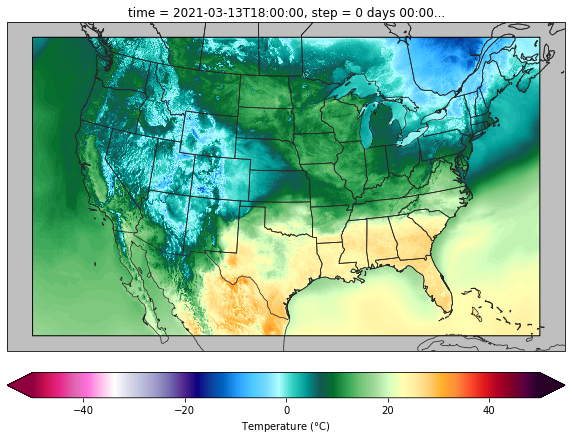

In [4]:
my_cmap = cm_tmp(levels=None)

ax = common_features('50m', STATES=True, crs=H.crs, figsize=[10,8])
p = (H.t2m -273.15).plot(x='longitude', y='latitude', ax=ax, transform=pc, **my_cmap.cmap_kwargs, 
                         cbar_kwargs=dict(orientation='horizontal', pad=.05,**my_cmap.cbar_kwargs))
domain_border(H)